# Notes
Remember to restart kernel if altering any of the loaded .ipynb files

In [1]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline
import numpy as np
import numexpr as ne
from datetime import datetime
import ipdb
%load_ext line_profiler
import import_ipynb
from Hexgrid2 import * # Contains the CA
# from Bathymetry import * # Contains a class to create a bathymetry

importing Jupyter notebook from Hexgrid2.ipynb
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [2]:
# Set initial position of mass
x = 100
y = 5

# Set bathymetry
# valid arguments 'river', 'pit'. bath(self, type='river', NX=201,NY=201)
# arg = 'pit'
# b = bath(arg)
# bathymetry = b.bathymetry

# Run the code here

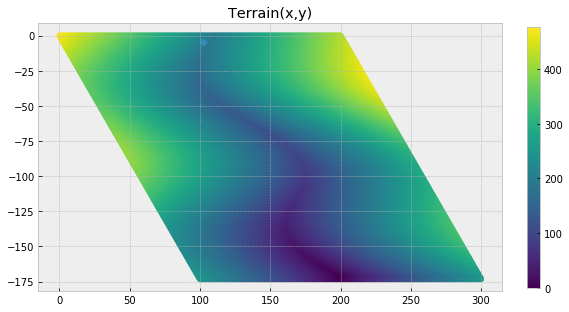

In [3]:
# terrain =  bathymetry[::-1,:]  # BRUK MED RIVER
# terrain = 10*bathymetry[:201,:201] # BRUK MED PIT
grid = Hexgrid(201,201,reposeAngle = np.deg2rad(0), terrain = 'river')

fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, aspect = 'equal')
points = ax.scatter(grid.X[:,:,0].flatten(), grid.X[:,:,1].flatten(), marker = 'h', c = grid.Q_a.flatten())
fig.colorbar(points,fraction=0.026)
ax.set_title('Terrain(x,y)')

ax.scatter(grid.X[y, x,0], grid.X[y, x,1]) # Targeting

# Slope failure testing

In [4]:

startTime = datetime.now()


Nt =500
grid.Q_d[y, x] += 5000
average = np.mean(grid.Q_d[1:-1,1:-1])
timeseries = np.zeros(Nt)
for i in range(Nt):
    grid.time_step()
#     if i > 100:
#         timeseries[i] = grid.height[int(y),int(x)]
    
#     if i < 100:
#         grid.height[y, x] += 100


print ("Time used to calculate " , i+1 , " timesteps: ", datetime.now() - startTime)
print("Sum of mass in all cells: ", np.sum(grid.Q_d[1:grid.Nx-1,1:grid.Ny-1]))

#   USING ROLL
# Time used to calculate  500  timesteps:  0:00:06.572968
# Sum of mass in all cells:  1000.0
 
#          75162 function calls in 6.574 seconds

#  Before:
# Time used to calculate  500  timesteps:  0:00:08.062949
# Sum of mass in all cells:  1000.0
 
#          15162 function calls in 8.063 seconds
# fig = plt.figure(figsize = (9,5))
# plt.plot(timeseries)
# plt.plot([0, Nt], [average, average], '--', c = 'k')
# eps = 50
# plt.ylim(average - eps, average + eps)

Time used to calculate  500  timesteps:  0:00:04.942845
Sum of mass in all cells:  5000.0


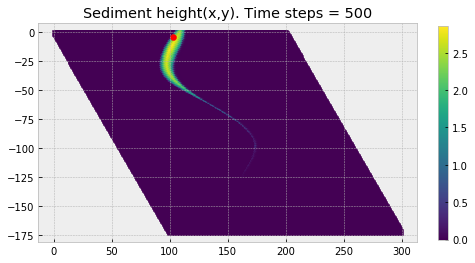

In [5]:

fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(131, aspect = 'equal')
points = ax.scatter(grid.X[:,:,0].flatten(), grid.X[:,:,1].flatten(), marker = ',', c = np.log(1+grid.Q_d.flatten()))
ax.scatter(grid.X[y, x,0], grid.X[y, x,1], c ='r') # Targeting
ax.set_title('Sediment height(x,y). Time steps = ' + str(i+1))
fig.colorbar(points,fraction=0.026)


# #fig = plt.figure(figsize = (9,9))
# ax = fig.add_subplot(132, aspect = 'equal')
# points =ax.scatter(grid.X[:,:,0].flatten(), grid.X[:,:,1].flatten(), marker = '.', c = grid.totalheight.flatten())
# ax.set_title('Total Height(x,y)')
# fig.colorbar(points,fraction=0.026)

# # fig = plt.figure(figsize = (9,9))
# ax = fig.add_subplot(132, aspect = 'equal')
# points =ax.scatter(grid.X[:,:,0].flatten(), grid.X[:,:,1].flatten(), marker = '.', c = grid.seaBed.flatten())
# ax.set_title('Terrain(x,y)')
# fig.colorbar(points,fraction=0.026)

# fig2 = plt.figure(figsize = (9,5))
# plt.plot(timeseries) # Timeseries convergerer bare når angle of repose = 0. Fordi alle celler skal ha likt.
# plt.plot([0, Nt], [average, average], '--', c = 'k')
# eps = 5
# plt.ylim(average - eps, average + eps)

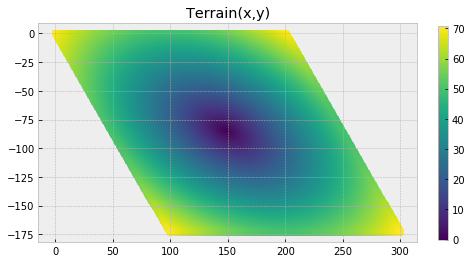

In [6]:


fig.savefig('t'+str(i+1)+'201x201_sediment.pdf', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype='a4', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, rasterize =True)

fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(131, aspect = 'equal')
points =ax.scatter(grid.X[:,:,0].flatten(), grid.X[:,:,1].flatten(), marker = ',', c = grid.seaBed.flatten())
ax.set_title('Terrain(x,y)')
fig.colorbar(points,fraction=0.026)

fig.savefig('t'+str(i+1)+'201x201_terrain.pdf', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype='a4', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, rasterize =True)

In [7]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)
